In [ ]:
# %% read data

import pandas as pd

crimes = pd.read_csv(
    u"C:\\Users\\juanj\\Documents\\Python\\Final\\sqf-2012-csv.zip"
)

num_rows = crimes.shape[0]
num_rows

<ipython-input-2-1f079804c257>:4: DtypeWarning: Columns (10,73,103,110,111) have mixed types. Specify dtype option on import or set low_memory=False.
  crimes = pd.read_csv(


532911

In [ ]:
# %%

# Check for missing values
missing_values = crimes.isnull().sum()

# Drop empty columns
crimes.drop('compyear', axis=1, inplace=True)
crimes.drop('comppct', axis=1, inplace=True)

# Separate numerical and non-numerical columns
numerical_cols = crimes.select_dtypes(include=['number']).columns
non_numerical_cols = crimes.select_dtypes(exclude=['number']).columns

# Handle missing values
# Fill numerical columns with mean
crimes[numerical_cols] = crimes[numerical_cols].fillna(crimes[numerical_cols].mean())

# Fill non-numerical columns with mode
for col in non_numerical_cols:
    if not crimes[col].mode().empty:
        mode_value = crimes[col].mode()[0]
        crimes[col] = crimes[col].fillna(mode_value)

# Check for duplicate data
duplicates = crimes.duplicated().sum()

# Remove duplicates
crimes = crimes.drop_duplicates()

num_rows = crimes.shape[0]
num_rows

532911

Number of rows not ending with 2012: 0
Number of rows where 'timestop' is higher than 2400: 0
The range of the age column is from 0.0 to 955.0, with a range of 955.0.


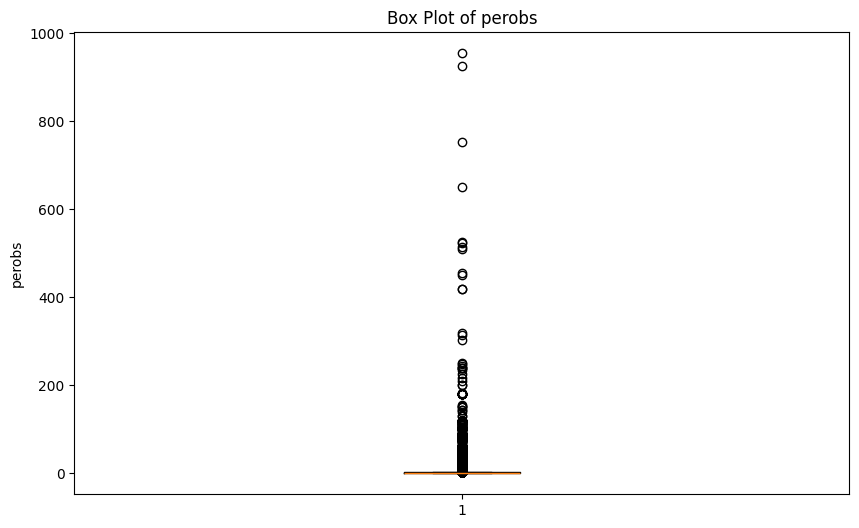

In [ ]:
# %% outliers

import matplotlib.pyplot as plt

crimes[numerical_cols].head()

# Convert the integer column to string
crimes['datestop'] = crimes['datestop'].astype(str)

# Check if values in 'column_name' do not end with '2012'
not_ends_with_2012 = ~crimes['datestop'].str.endswith('2012')

# Count the number of rows where the condition is True
count_not_ending_with_2012 = not_ends_with_2012.sum()

print(f"Number of rows not ending with 2012: {count_not_ending_with_2012}")

# Check if any value in 'timestop' is higher than 2400
higher_than_2400 = crimes['timestop'] > 2400

# Count the number of rows where the condition is True
count_higher_than_2400 = higher_than_2400.sum()

print(f"Number of rows where 'timestop' is higher than 2400: {count_higher_than_2400}")

# observation period
min_obs = crimes['perobs'].min()
max_obs = crimes['perobs'].max()

obs_range = max_obs - min_obs

print(f"The range of the age column is from {min_obs} to {max_obs}, with a range of {obs_range}.")

# Plotting the range of 'perobs'
plt.figure(figsize=(10, 6))
plt.boxplot(crimes['perobs'])
plt.title('Box Plot of perobs')
plt.ylabel('perobs')
plt.show()

# dob period
crimes['dob'] = pd.to_datetime(crimes['dob'], format='%m%d%Y', errors='coerce')

# Display the DataFrame to confirm the conversion
# print(crimes[['dob']].head())

min_dob = crimes['dob'].min()
max_dob = crimes['dob'].max()
dob_range = max_dob - min_dob
# print(f"The range of the age column is from {min_dob} to {max_dob}, with a range of {dob_range}.")

# Calculate the difference between '2012-12-31' and the 'dob' column
reference_date = pd.to_datetime('2012-12-31')
crimes['calc_age'] = (reference_date - crimes['dob']).dt.days // 365
# print(crimes[['dob', 'calc_age']].head())

# Count the number of rows where 'age' is over 100
count_over_100 = crimes[crimes['calc_age'] > 100].shape[0]

#50% of dob wrong. drop column
crimes.drop('dob', axis=1, inplace=True)
crimes.drop('calc_age', axis=1, inplace=True)

The range of the age column is from 0 to 999, with a range of 999.


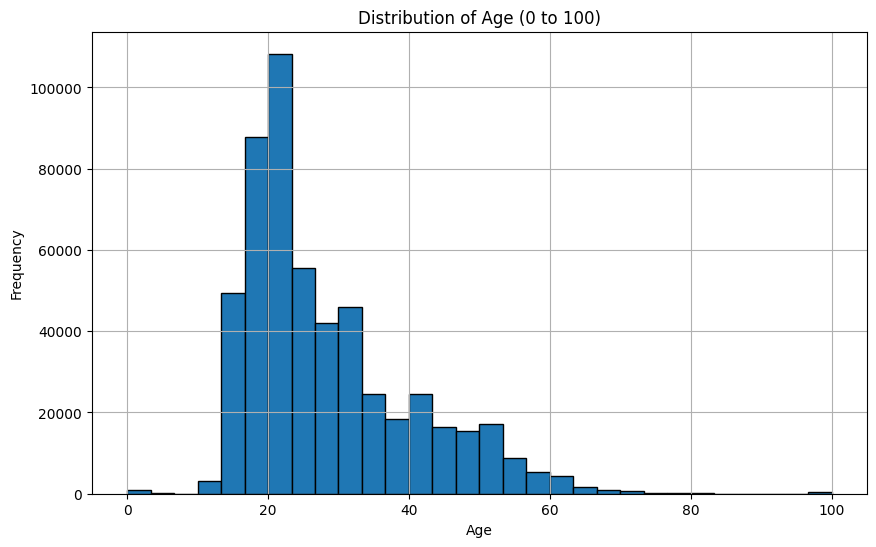

% of rows where age is outside the range of 0 to 100: 0.001692590319959618
The range of the weight column is from 0 to 999, with a range of 999.


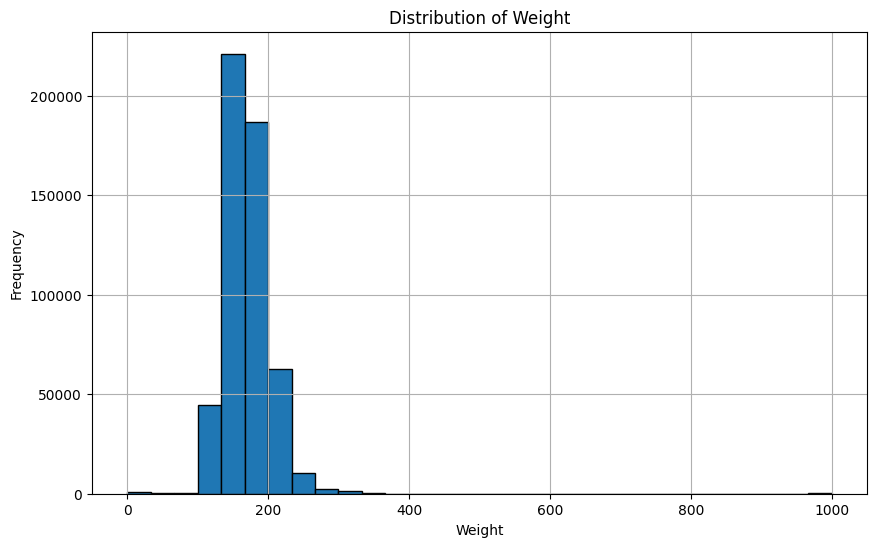

%of rows where weight is over 600: 0.0006691616119276178


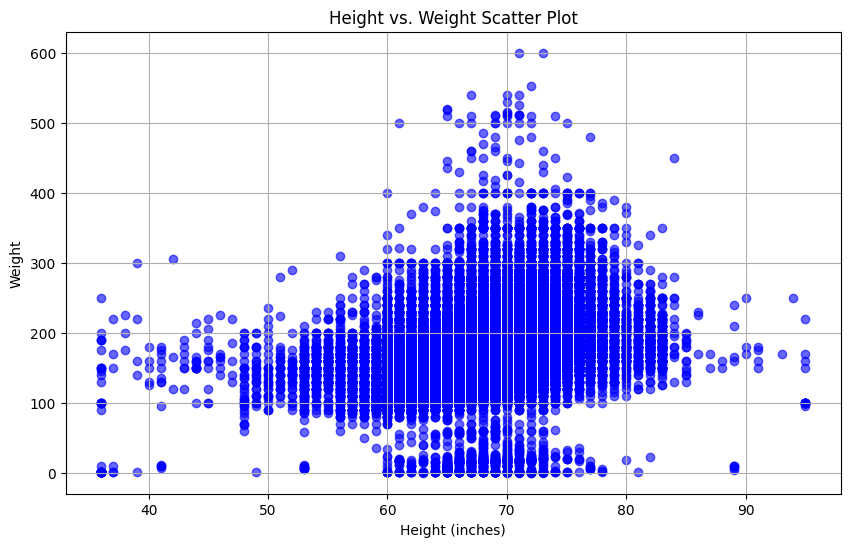

In [ ]:
#%% age outliers

min_age = crimes['age'].min()
max_age = crimes['age'].max()

age_range = max_age - min_age

print(f"The range of the age column is from {min_age} to {max_age}, with a range of {age_range}.")

# Plot a histogram of the 'age' column
plt.figure(figsize=(10, 6))
plt.hist(crimes['age'], bins=30, range=(0, 100), edgecolor='black')
plt.title('Distribution of Age (0 to 100)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print outliers
count_outside_100 = crimes[(crimes['age'] < 0) | (crimes['age'] > 100)].shape[0]
print(f"% of rows where age is outside the range of 0 to 100: {count_outside_100/num_rows}")

# Drop outliers
crimes = crimes[(crimes['age'] >= 0) & (crimes['age'] <= 100)]
num_rows = crimes.shape[0]
num_rows

# weight outliers

min_weight = crimes['weight'].min()
max_weight = crimes['weight'].max()

weight_range = max_weight - min_weight

print(f"The range of the weight column is from {min_weight} to {max_weight}, with a range of {weight_range}.")

# Plot a histogram of the 'weight' column
plt.figure(figsize=(10, 6))
plt.hist(crimes['weight'], bins=30, edgecolor='black')
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Count the number of rows where 'weight' is over 300
count_over_600 = crimes[crimes['weight'] > 600].shape[0]
print(f"%of rows where weight is over 600: {count_over_600/num_rows}")

# Drop outliers
crimes = crimes[(crimes['weight'] <= 600)]
num_rows = crimes.shape[0]
num_rows

# Create a new column 'total_inches'
crimes['ht_inches'] = crimes['ht_feet'] * 12 + crimes['ht_inch']

crimes.drop('ht_feet', axis=1, inplace=True)
crimes.drop('ht_inch', axis=1, inplace=True)

# Plot a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(crimes['ht_inches'], crimes['weight'], color='blue', alpha=0.6)
plt.xlabel('Height (inches)')
plt.ylabel('Weight')
plt.title('Height vs. Weight Scatter Plot')
plt.grid(True)
plt.show()

In [ ]:
#%% Calculate the correlation between 'weight' and 'ht'

correlation = crimes['weight'].corr(crimes['ht_inches'])

print(f"The correlation between weight and height is: {correlation:.2f}")

The correlation between weight and height is: 0.45


crimsusp_grouped
FEL                  104780
MISD                  80936
FELONY                69088
Others                57495
CPW                   55841
ROBBERY               48525
BURGLARY              19872
GLA                   18630
CPM                   11210
GRAND LARCENY          8689
ASSAULT                8103
CRIMINAL TRESPASS      7286
MISDEMEANOR            5918
BURG                   5575
CRIM TRES              5382
CPCS                   4997
MIS                    4663
PETIT LARCENY          4048
F                      3941
CSCS                   3500
FELONY/ROBBERY         3174
Name: count, dtype: int64


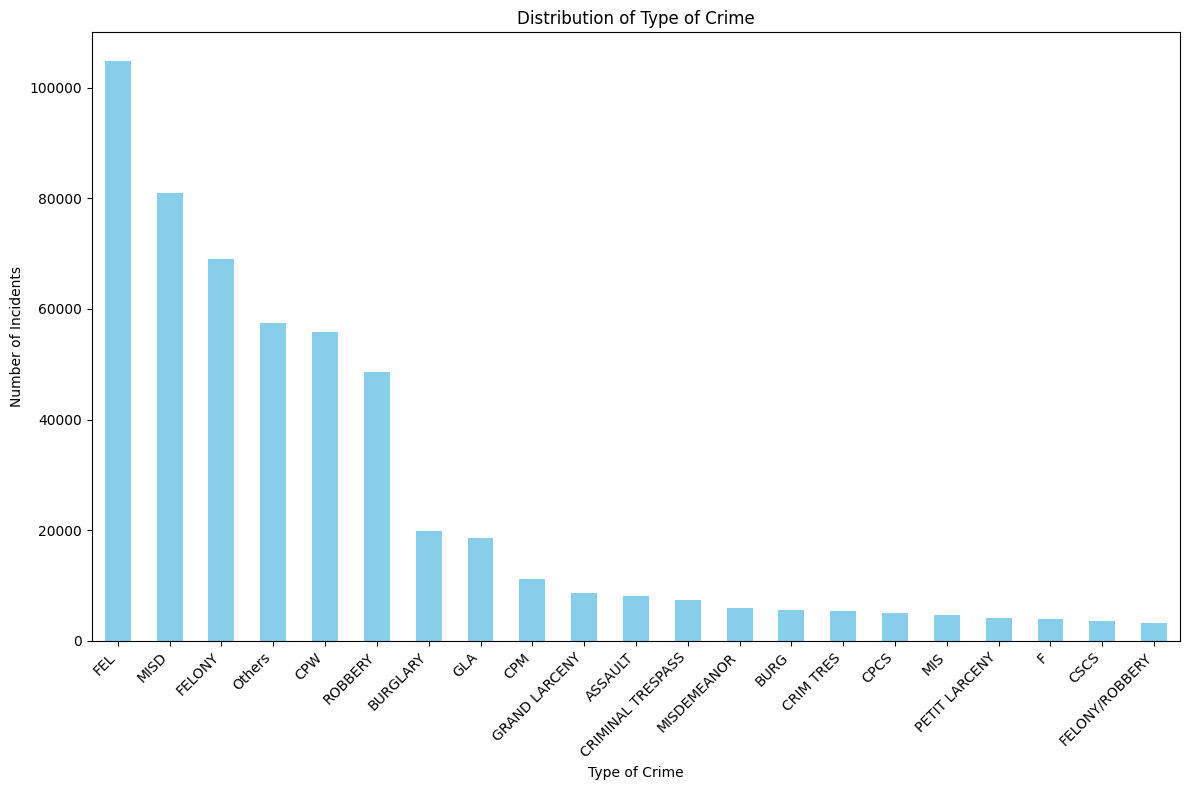

Number of unique types in 'crimsusp_grouped': 21


In [ ]:
# %% non numerical features - type of crimes

import numpy as np

# Set the threshold for grouping smaller categories
threshold = 2500  # to fit to 20 types

# Compute the value counts for the 'crimsusp' column
value_counts = crimes['crimsusp'].value_counts()

# Create a mask to identify categories that meet the threshold
mask = crimes['crimsusp'].isin(value_counts[value_counts >= threshold].index)

# Use numpy.where to efficiently create the 'crimsusp_grouped' column
crimes['crimsusp_grouped'] = np.where(mask, crimes['crimsusp'], 'Others')

# Display the value counts of the new grouped column
grouped_counts = crimes['crimsusp_grouped'].value_counts()
print(grouped_counts)

# Plot a bar chart
plt.figure(figsize=(12, 8))
grouped_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Type of Crime')
plt.ylabel('Number of Incidents')
plt.title('Distribution of Type of Crime')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for the x-axis labels
plt.show()

unique_types_count = crimes['crimsusp_grouped'].nunique()
print(f"Number of unique types in 'crimsusp_grouped': {unique_types_count}")

# Drop the 'crimsusp' column
crimes = crimes.drop(columns=['crimsusp'])

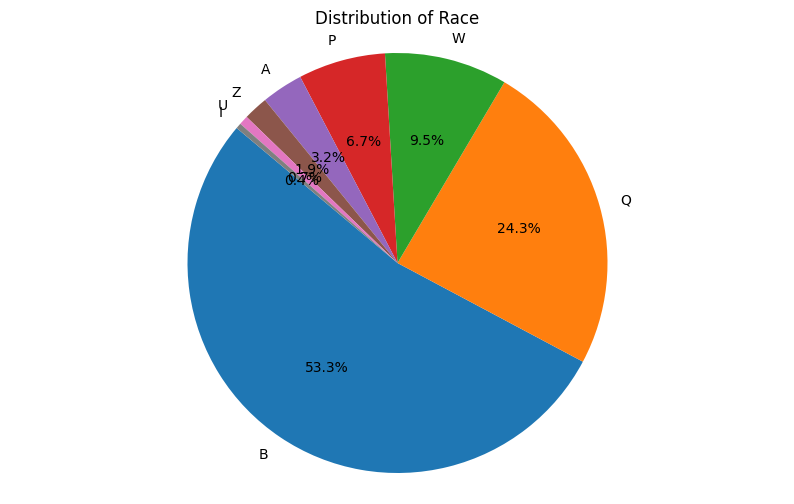

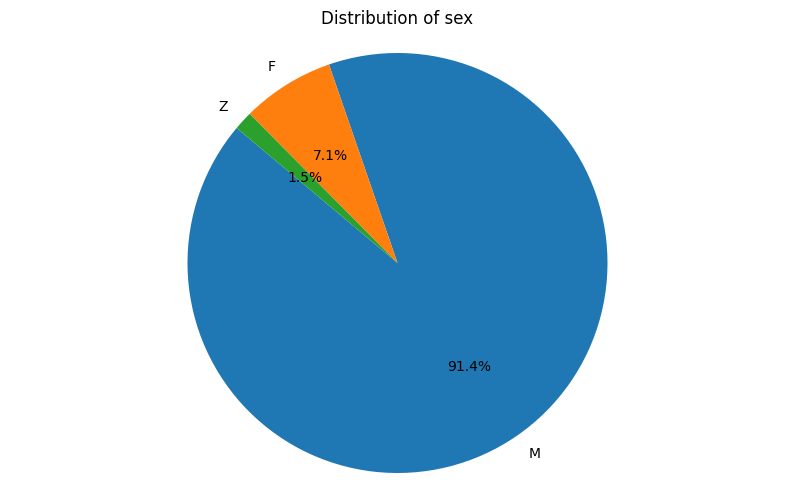

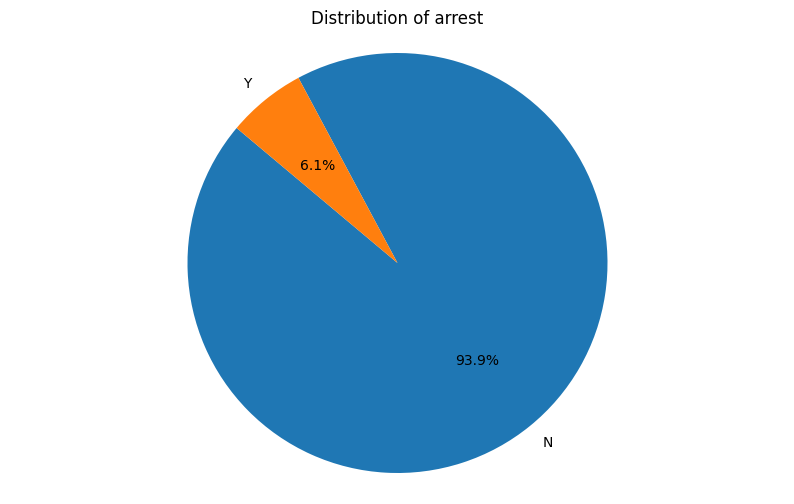

In [ ]:
# %%  non numerical features - race

race_count = crimes['race'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 6))
plt.pie(race_count, labels=race_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Race')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

sex_count = crimes['sex'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 6))
plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of sex')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

arrest_count = crimes['arstmade'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 6))
plt.pie(arrest_count, labels=arrest_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of arrest')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<ipython-input-9-98aaba344507>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_subset = subset.apply(lambda x: x.replace({'Y': 1, 'N': 0, 'N/A': np.nan}) if x.dtype == 'object' else x)


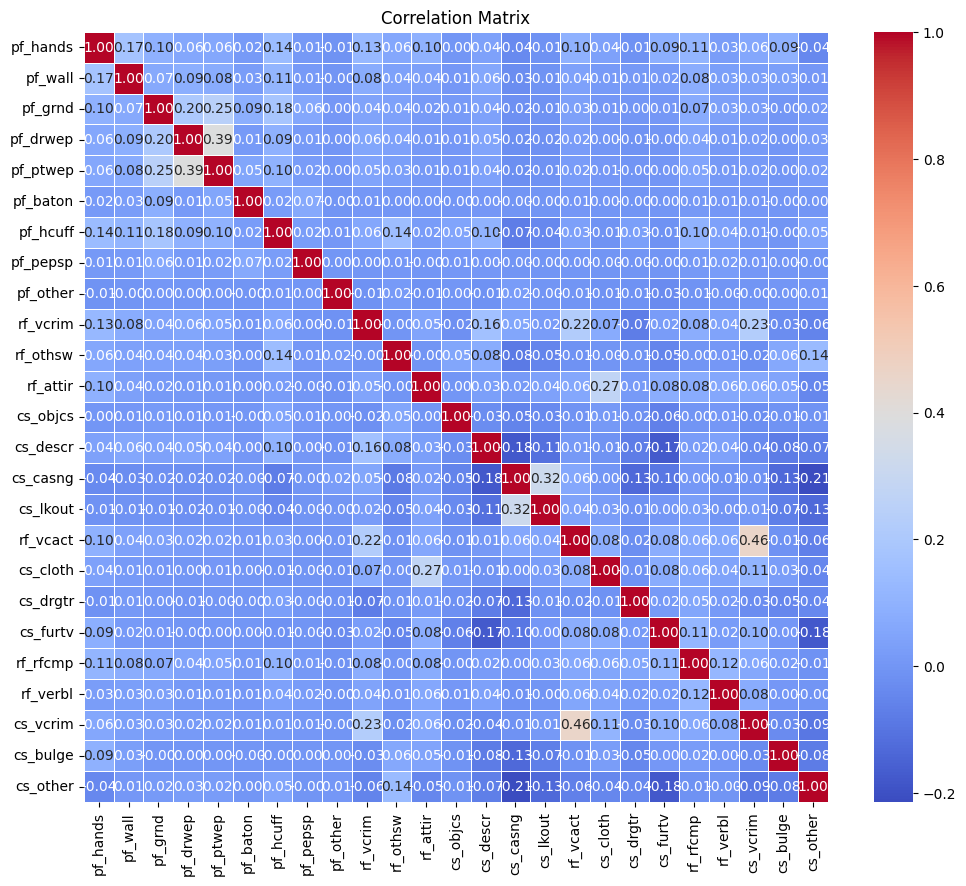

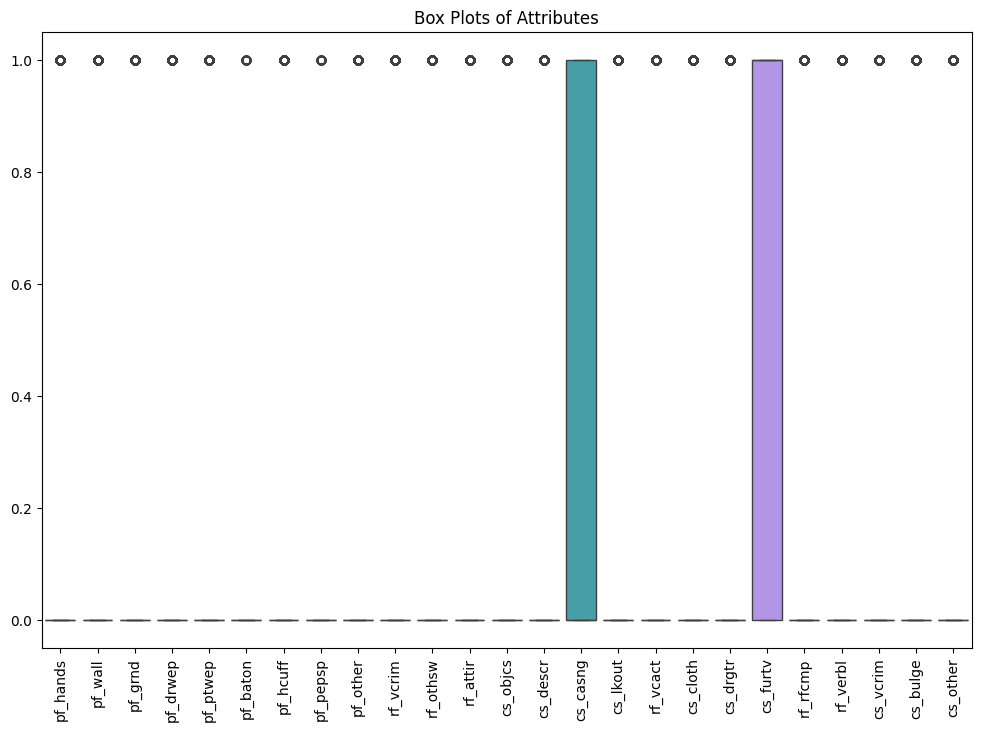

cs_casng
0    342201
1    189452
Name: count, dtype: int64
cs_furtv
1    274012
0    257641
Name: count, dtype: int64


In [ ]:
# %% correlate atributes

import seaborn as sns

selected_attributes = ['pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other',
                       'rf_vcrim', 'rf_othsw', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth',
                       'cs_drgtr', 'cs_furtv', 'rf_rfcmp', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other']

subset = crimes[selected_attributes]

# Convert categorical values to numeric
numeric_subset = subset.apply(lambda x: x.replace({'Y': 1, 'N': 0, 'N/A': np.nan}) if x.dtype == 'object' else x)

# Impute missing values with column mean
numeric_subset = numeric_subset.apply(lambda x: x.fillna(x.mean()) if x.dtype == 'float64' else x)

# Calculate the correlation matrix
correlation_matrix = numeric_subset.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# Box plots for each attribute
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_subset)
plt.title('Box Plots of Attributes')
plt.xticks(rotation=90)
plt.show()

print(numeric_subset['cs_casng'].value_counts())
print(numeric_subset['cs_furtv'].value_counts())

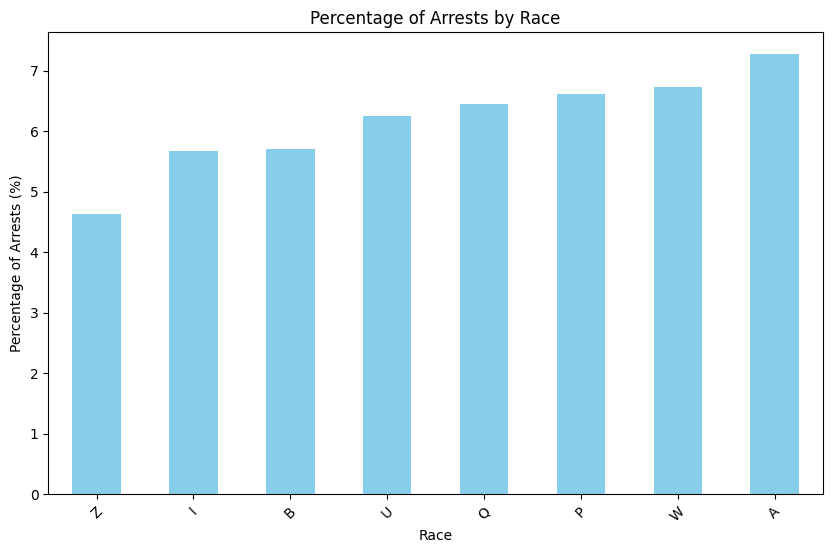

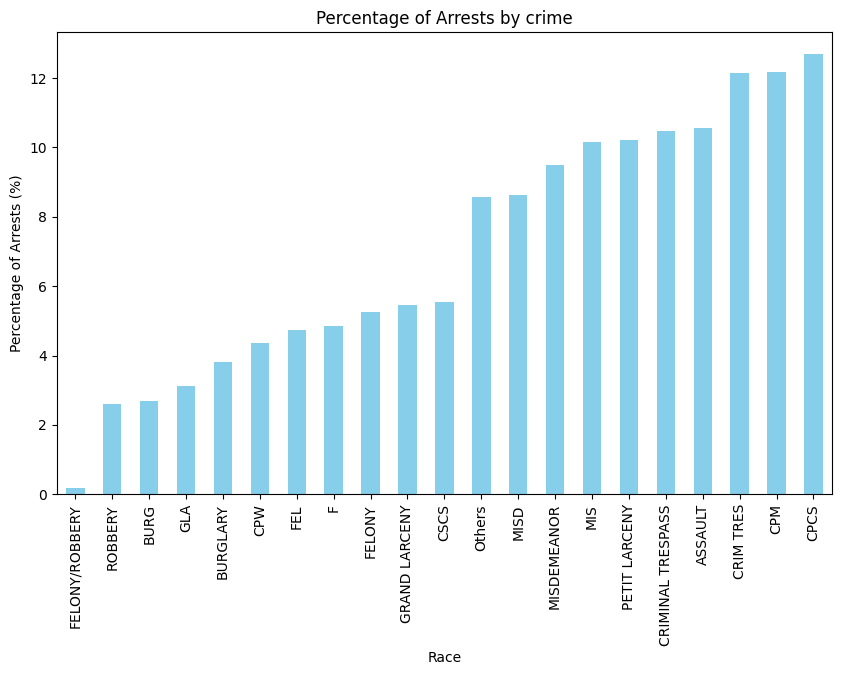

In [ ]:
# %% filter by race

race_count 

# Calculate the total number of arrests per race
arrests_per_race = crimes[crimes['arstmade'] == 'Y']['race'].value_counts()

# Calculate the percentage of arrests per race
percentage_arrests_per_race = (arrests_per_race / race_count) * 100
percentage_arrests_per_race

# Sort the percentages from lower to higher
percentage_arrests_per_race_sorted = percentage_arrests_per_race.sort_values()

# Create a histogram
plt.figure(figsize=(10, 6))
percentage_arrests_per_race_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Race')
plt.ylabel('Percentage of Arrests (%)')
plt.title('Percentage of Arrests by Race')
plt.xticks(rotation=45)
plt.show()

# Calculate the total number of arrests per crime
arrests_per_crime = crimes[crimes['arstmade'] == 'Y']['crimsusp_grouped'].value_counts()

# Calculate the percentage of arrests per race
percentage_arrests_per_crime = (arrests_per_crime / grouped_counts) * 100
percentage_arrests_per_crime

# Sort the percentages from lower to higher
percentage_arrests_per_crime_sorted = percentage_arrests_per_crime.sort_values()

# Create a histogram
plt.figure(figsize=(10, 6))
percentage_arrests_per_crime_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Race')
plt.ylabel('Percentage of Arrests (%)')
plt.title('Percentage of Arrests by crime')
plt.xticks(rotation=90)
plt.show()

     support                                itemsets
0   0.939301                            (arstmade_N)
1   0.060699                            (arstmade_Y)
2   0.442108                             (frisked_N)
3   0.557892                             (frisked_Y)
4   0.071421                                 (sex_F)
5   0.914021                                 (sex_M)
6   0.533239                                (race_B)
7   0.067153                                (race_P)
8   0.242878                                (race_Q)
9   0.094513                                (race_W)
10  0.432408                 (arstmade_N, frisked_N)
11  0.506893                 (arstmade_N, frisked_Y)
12  0.065187                     (arstmade_N, sex_F)
13  0.860093                     (sex_M, arstmade_N)
14  0.502866                    (arstmade_N, race_B)
15  0.062714                    (arstmade_N, race_P)
16  0.227237                    (arstmade_N, race_Q)
17  0.088153                    (arstmade_N, r

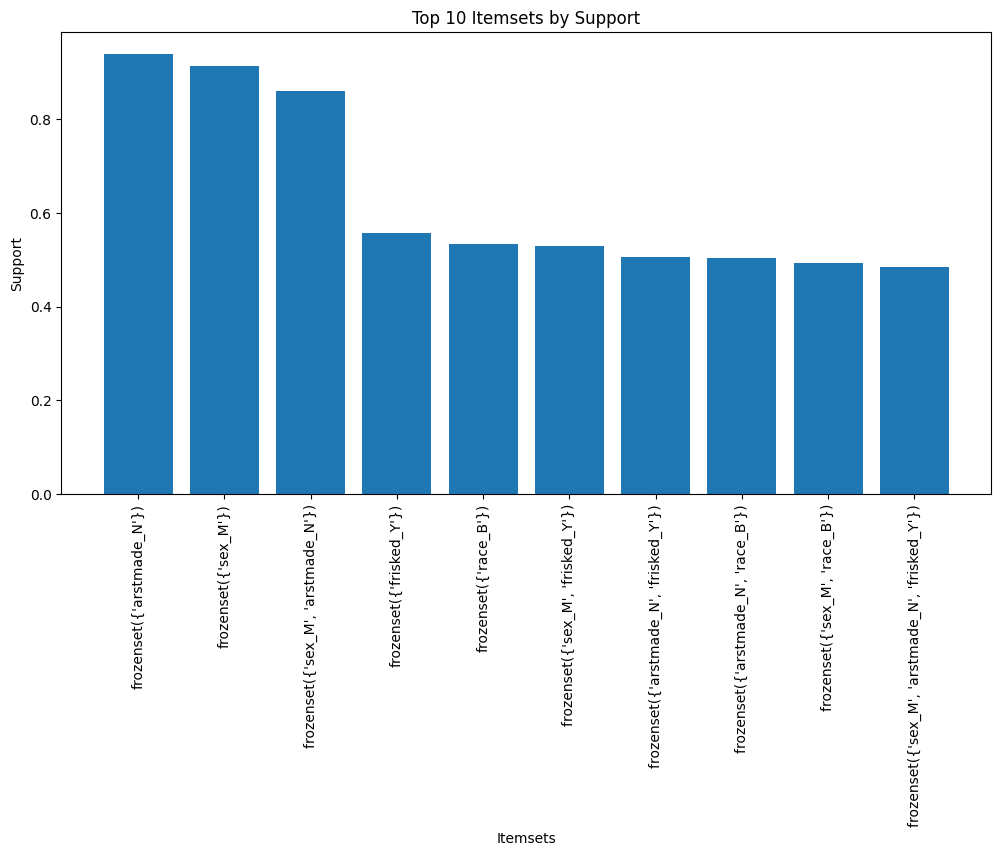

In [ ]:
# %% apriori for reasons for SQF by sex

from packaging.version import Version
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

selected_attributes = ['arstmade','frisked', 'sex', 'race']
apr = crimes[selected_attributes]
df_encoded = pd.get_dummies(apr)

# # # min_support = 0.1 : algorithm will consider itemsets that appear in 10% of the transactions.
frequent_itemsets = apriori(df_encoded, min_support=0.05,use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

print(frequent_itemsets)
print(rules)

top_itemsets = frequent_itemsets.nlargest(10, 'support')
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_itemsets)), top_itemsets['support'])
plt.xticks(range(len(top_itemsets)), top_itemsets['itemsets'], rotation=90)
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Top 10 Itemsets by Support')
plt.show()

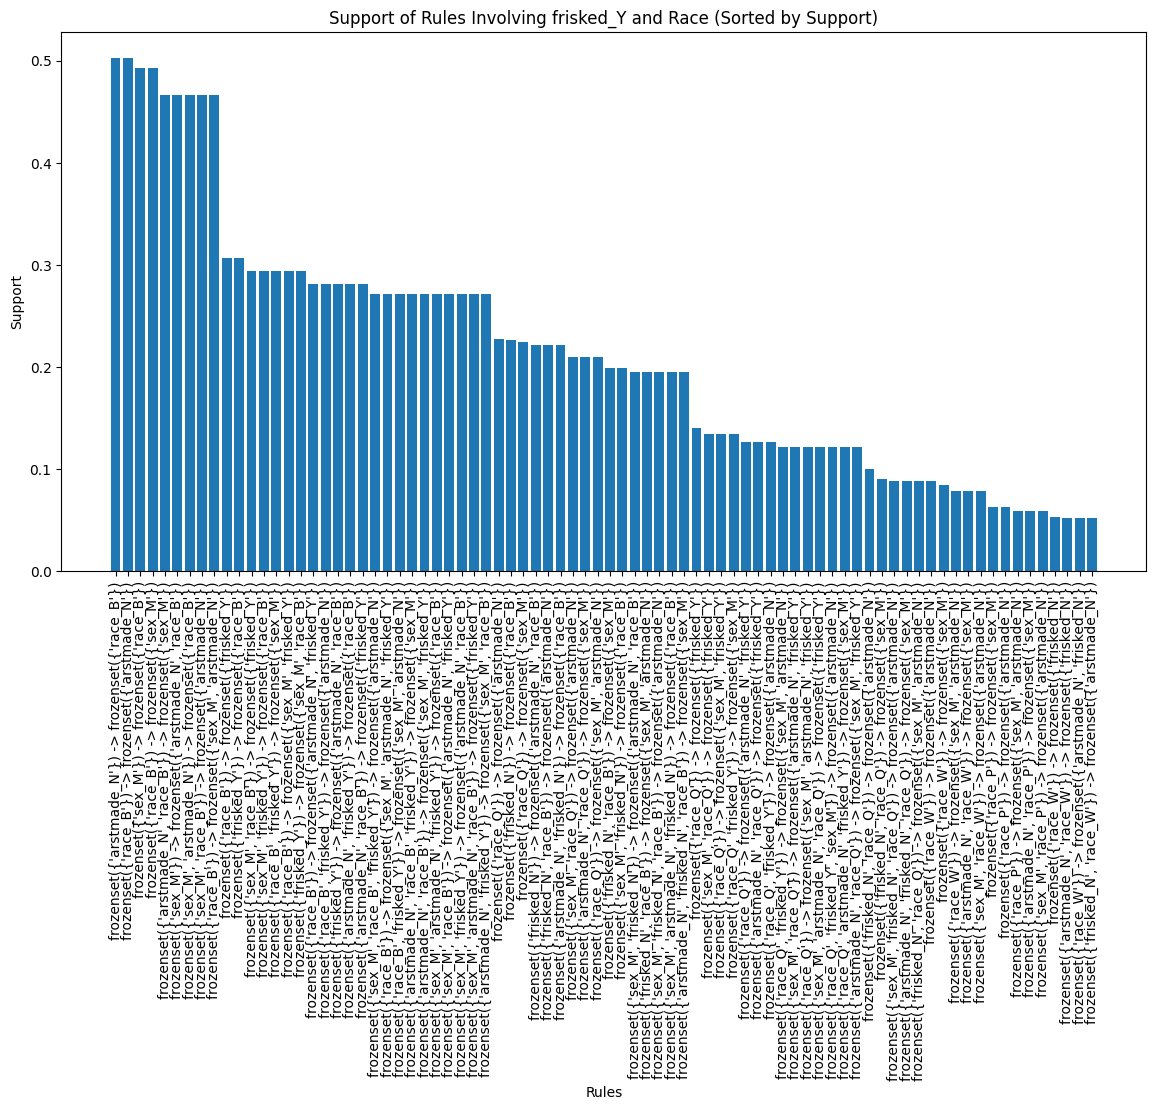

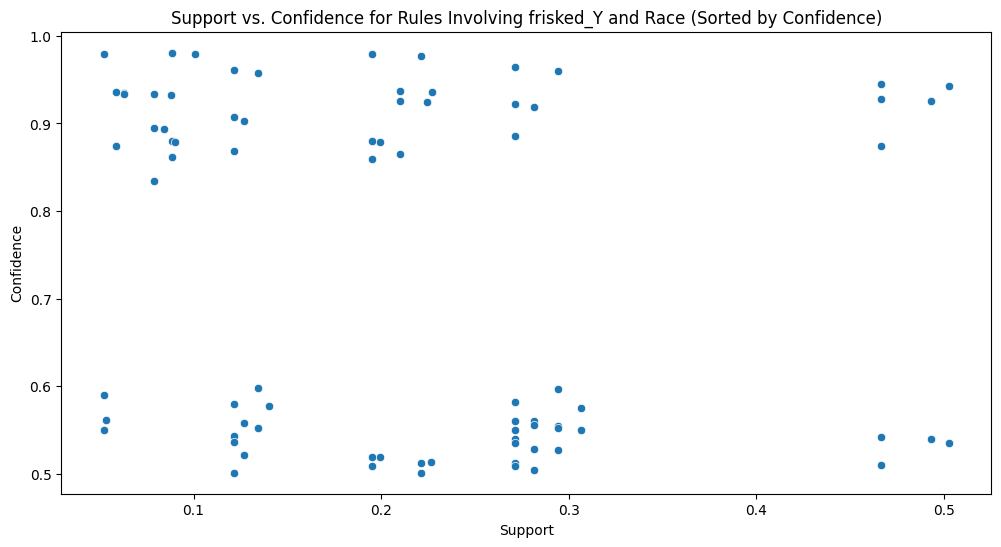

<ipython-input-12-b24526a48482>:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  race_frequencies = apr.groupby('race').apply(lambda x: (x['frisked'] == 'Y').sum() / len(x))


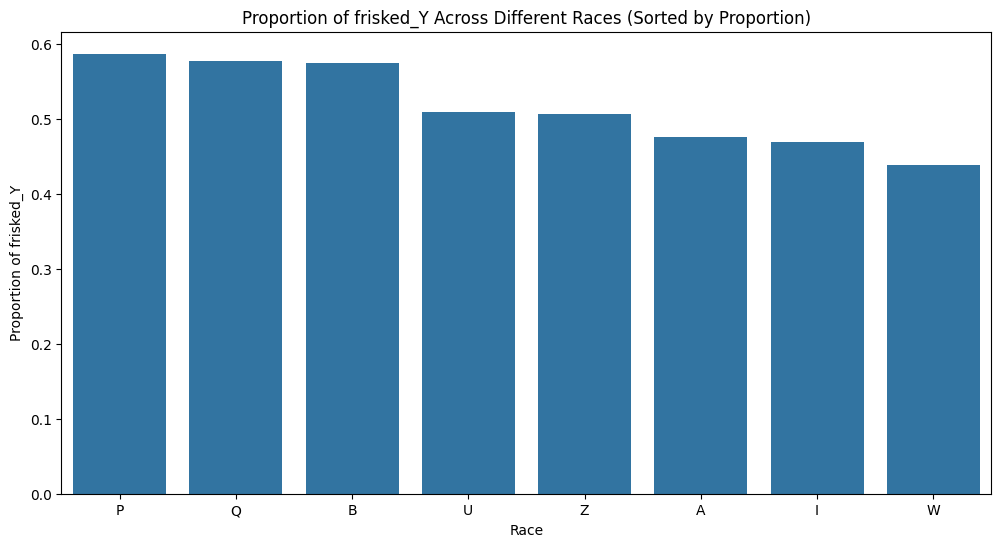

In [ ]:
#%%

import matplotlib.pyplot as plt
import seaborn as sns

# Filter rules involving 'frisked_Y' and races
frisked_Y_race_rules = rules[
    rules['antecedents'].apply(lambda x: any(attr in x for attr in ['race_A', 'race_B', 'race_I', 'race_P', 'race_Q', 'race_U', 'race_W', 'race_Z'])) |
    rules['consequents'].apply(lambda x: any(attr in x for attr in ['race_A', 'race_B', 'race_I', 'race_P', 'race_Q', 'race_U', 'race_W', 'race_Z']))
]

# Sort by Support in descending order
frisked_Y_race_rules_sorted_by_support = frisked_Y_race_rules.sort_values(by='support', ascending=False)

# Plot Support for rules involving 'frisked_Y' and races
plt.figure(figsize=(14, 7))
plt.bar(range(len(frisked_Y_race_rules_sorted_by_support)), frisked_Y_race_rules_sorted_by_support['support'])
plt.xticks(range(len(frisked_Y_race_rules_sorted_by_support)), 
           frisked_Y_race_rules_sorted_by_support['antecedents'].astype(str) + ' -> ' + frisked_Y_race_rules_sorted_by_support['consequents'].astype(str), 
           rotation=90)
plt.xlabel('Rules')
plt.ylabel('Support')
plt.title('Support of Rules Involving frisked_Y and Race (Sorted by Support)')
plt.show()

# Sort by Confidence in descending order
frisked_Y_race_rules_sorted_by_confidence = frisked_Y_race_rules.sort_values(by='confidence', ascending=False)

# Scatter plot of Confidence vs. Support for rules involving 'frisked_Y' and races
plt.figure(figsize=(12, 6))
sns.scatterplot(x='support', y='confidence', data=frisked_Y_race_rules_sorted_by_confidence)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence for Rules Involving frisked_Y and Race (Sorted by Confidence)')
plt.show()

# Calculate proportions of 'frisked_Y' across races
race_frequencies = apr.groupby('race').apply(lambda x: (x['frisked'] == 'Y').sum() / len(x))
race_frequencies = race_frequencies.reset_index(name='Proportion of frisked_Y')

# Sort by Proportion in descending order
race_frequencies_sorted = race_frequencies.sort_values(by='Proportion of frisked_Y', ascending=False)

# Plot Proportions
plt.figure(figsize=(12, 6))
sns.barplot(x='race', y='Proportion of frisked_Y', data=race_frequencies_sorted)
plt.xlabel('Race')
plt.ylabel('Proportion of frisked_Y')
plt.title('Proportion of frisked_Y Across Different Races (Sorted by Proportion)')
plt.show()

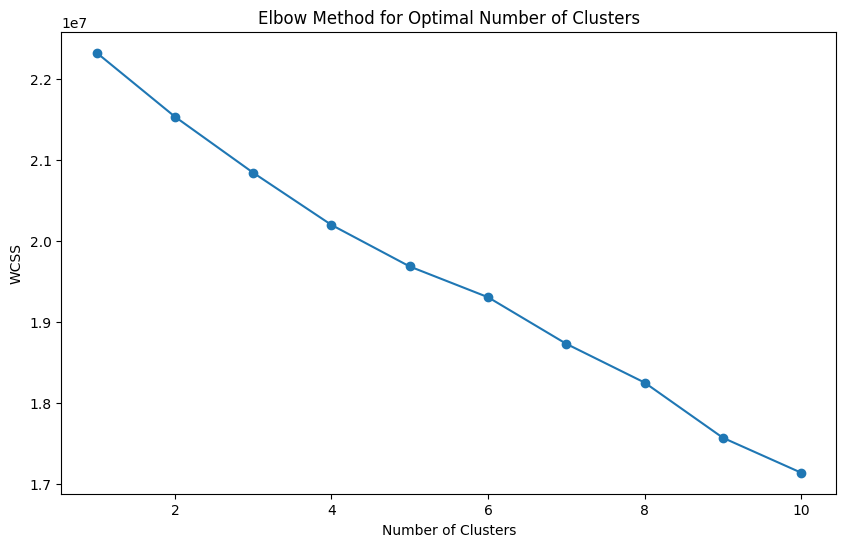

   year  pct  ser_num   datestop timestop recstat inout trhsloc  perobs  \
0  2012   40       17 2012-10-01      115       1     O       P     2.0   
1  2012   23      691 2012-10-01      310       1     I       P     2.0   
2  2012   81     3714 2012-10-01     2000       1     O       P     1.0   
3  2012   81      633 2012-10-02     1245       1     O       P     3.0   
4  2012   66       36 2012-10-04     2220       A     O       P     2.0   

  perstop  ...   ycoord dettypcm linecm detailcm ht_inches crimsusp_grouped  \
0       5  ...   233036       CM      1       85        69          ROBBERY   
1       5  ...   228179       CM      1        9        67           Others   
2       5  ...   190702       CM      1       85        69          ROBBERY   
3       5  ...   186668       CM      1       85        65          ROBBERY   
4      10  ...   173599       CM      1       46        67           FELONY   

  age_range month hour cluster  
0     20-30    10    1       1  
1     10

In [ ]:
# %% clustering

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#ages clasiffication
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
crimes['age_range'] = pd.cut(crimes['age'], bins=bins, labels=labels, right=False)

#extract month
crimes['datestop'] = pd.to_datetime(crimes['datestop'], format='%m%d%Y')
crimes['month'] = crimes['datestop'].dt.month

#extract hour
crimes['timestop'] = crimes['timestop'].astype(str)
crimes['hour'] = crimes['timestop'].str.zfill(4).str[:2].astype(int)

# Select the features you want to cluster
selected_attributes = ['arstmade','frisked', 'hour', 'month', 'age_range', 
                        'sex', 'race', 'crimsusp_grouped']
clust = crimes[selected_attributes]

# Convert categorical data to numeric using one-hot encoding
clust_encoded = pd.get_dummies(clust, drop_first=True)

# standarize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clust_encoded)

# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
crimes['cluster'] = y_kmeans

print(crimes.head())

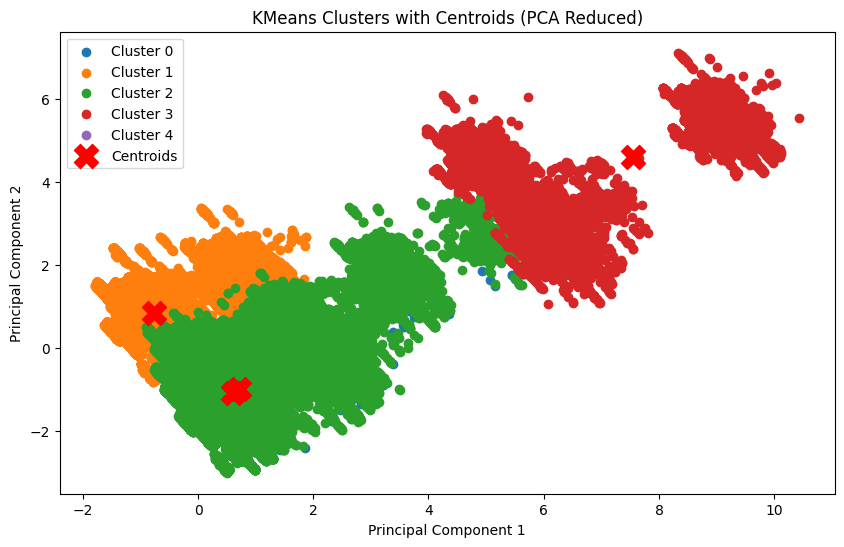

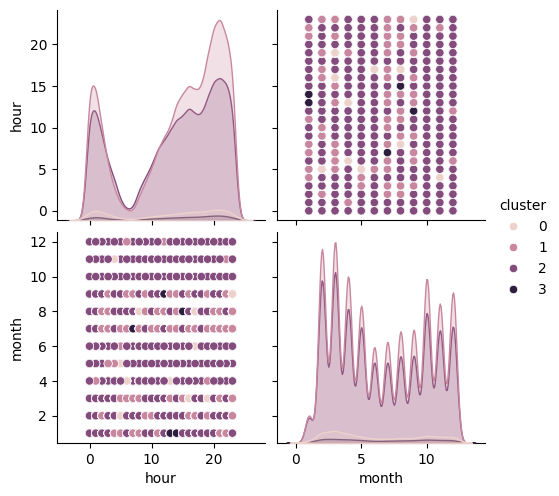

In [ ]:
# %%

from sklearn.decomposition import PCA

# Reduce the data to two dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit KMeans to the reduced data (already done, so use existing labels and model)
kmeans_centroids = kmeans.cluster_centers_
kmeans_centroids_pca = pca.transform(kmeans_centroids)  # Transform centroids to the PCA space

# Create a DataFrame with the principal components and cluster labels
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = y_kmeans

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(5):
    cluster_data = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

# Plot the centroids
plt.scatter(kmeans_centroids_pca[:, 0], kmeans_centroids_pca[:, 1], s=300, c='red', label='Centroids', marker='X')

# Adding titles and labels
plt.title('KMeans Clusters with Centroids (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


# Merge the clusters with the original DataFrame
clust_viz = crimes[selected_attributes].copy()
clust_viz['cluster'] = y_kmeans

# Convert categorical variables to strings for better plotting
for col in ['sex', 'race', 'crimsusp_grouped', 'age_range']:
    clust_viz[col] = clust_viz[col].astype(str)

# Plot pair plots with clusters
sns.pairplot(clust_viz, hue='cluster', diag_kind='kde')
plt.show()

        year  pct  ser_num   datestop timestop recstat inout trhsloc  perobs  \
5       2012   32      163 2012-10-05     1550       A     O       P     5.0   
9       2012   67      195 2012-10-06     1630       1     O       P     2.0   
10      2012   44      270 2012-10-06     1730       A     I       P     2.0   
19      2012   67      509 2012-10-08     1925       1     O       P     1.0   
23      2012   79      888 2012-01-10     2120       A     O       P     1.0   
...      ...  ...      ...        ...      ...     ...   ...     ...     ...   
532377  2012  122     6267 2012-12-10     1419       1     O       P     1.0   
532378  2012  122     6268 2012-12-10     1419       1     O       P     1.0   
532379  2012  122     6269 2012-12-09       40       1     O       P     2.0   
532380  2012  122     6270 2012-12-13     2315       1     O       P     1.0   
532381  2012  122     6271 2012-12-13     2315       1     O       P     1.0   

       perstop  ...   ycoord dettypcm l

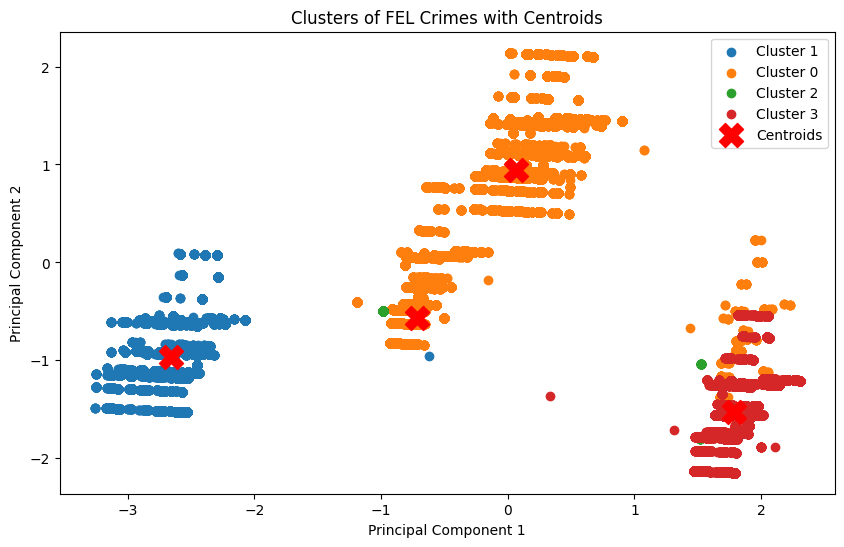

In [ ]:
#%%

# Filter the DataFrame for 'crimsusp_grouped' type 'FEL'
fel_crimes = crimes[crimes['crimsusp_grouped'] == 'FEL']

# Select the features you want to cluster
selected_attributes = ['city', 'pct', 'sector']

clust_fel = fel_crimes[selected_attributes]

# Convert categorical data to numeric using one-hot encoding
clust_encoded_fel = pd.get_dummies(clust_fel, drop_first=True)

# standarize
scaler = StandardScaler()
X_scaled_fel = scaler.fit_transform(clust_encoded_fel)

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans_fel = kmeans.fit_predict(X_scaled_fel)

# Add the cluster labels to the original DataFrame
fel_crimes.loc[:, 'cluster'] = y_kmeans_fel

print(fel_crimes)


# Reduce the data to two dimensions using PCA
pca = PCA(n_components=2)
principal_components_fel = pca.fit_transform(X_scaled_fel)

# Create a DataFrame with the principal components and cluster labels
pca_df_fel = pd.DataFrame(data=principal_components_fel, columns=['PC1', 'PC2'])
pca_df_fel['cluster'] = y_kmeans_fel

# Get the centroids
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in pca_df_fel['cluster'].unique():
    cluster_data = pca_df_fel[pca_df_fel['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

# Plot the centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', label='Centroids', marker='X')

plt.title('Clusters of FEL Crimes with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

<ipython-input-16-8b7883155d6f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_by['cluster'] = y_kmeans_stp


       rf_vcrim rf_othsw rf_attir cs_objcs cs_descr cs_casng cs_lkout  \
0             Y        N        N        N        N        Y        N   
1             N        N        N        N        N        N        N   
2             N        N        N        N        Y        N        N   
3             N        N        N        N        Y        N        N   
4             N        N        N        N        Y        Y        N   
...         ...      ...      ...      ...      ...      ...      ...   
532906        N        N        N        N        N        Y        Y   
532907        N        N        N        N        N        Y        Y   
532908        N        N        N        N        N        Y        Y   
532909        N        N        N        N        N        Y        Y   
532910        N        N        N        N        N        Y        Y   

       rf_vcact cs_cloth cs_drgtr cs_furtv rf_rfcmp rf_verbl cs_vcrim  \
0             Y        N        N        Y        

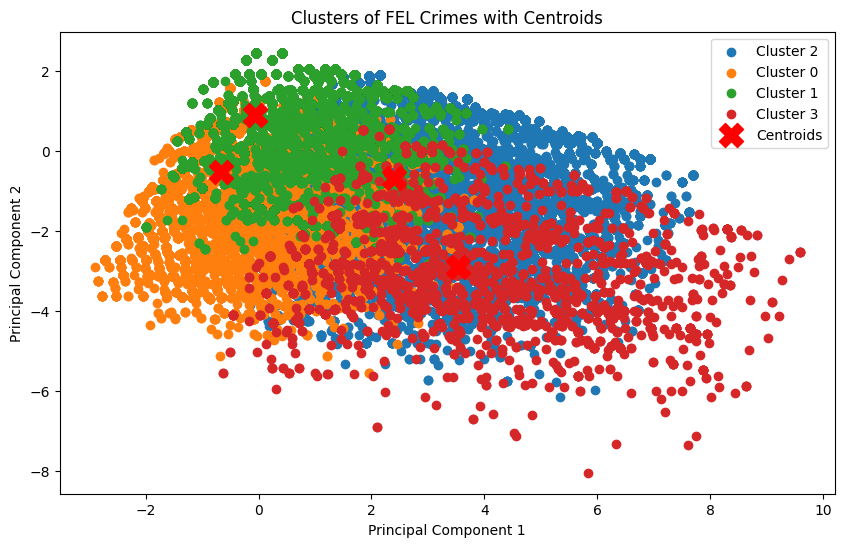

In [ ]:
# %%

# Select the features you want to cluster
selected_attributes = ['rf_vcrim', 'rf_othsw','rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 
                        'cs_lkout', 'rf_vcact','cs_cloth','cs_drgtr', 'cs_furtv', 'rf_rfcmp', 
                        'rf_verbl', 'cs_vcrim','cs_bulge', 'cs_other',]

stop_by= crimes[selected_attributes]

# Convert categorical data to numeric using one-hot encoding
clust_encoded_stp = pd.get_dummies(stop_by, drop_first=True)

# standarize
scaler = StandardScaler()
X_scaled_stp = scaler.fit_transform(clust_encoded_stp)

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans_stp = kmeans.fit_predict(X_scaled_stp)

# Add the cluster labels to the original DataFrame
stop_by['cluster'] = y_kmeans_stp

print(stop_by)


# Reduce the data to two dimensions using PCA
pca = PCA(n_components=2)
principal_components_stp = pca.fit_transform(X_scaled_stp)

# Create a DataFrame with the principal components and cluster labels
pca_df_stp = pd.DataFrame(data=principal_components_stp, columns=['PC1', 'PC2'])
pca_df_stp['cluster'] = y_kmeans_stp

# Get the centroids
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in pca_df_stp['cluster'].unique():
    cluster_data = pca_df_stp[pca_df_stp['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

# Plot the centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', label='Centroids', marker='X')

plt.title('Clusters of FEL Crimes with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
#%% Can we predict if a person is armed using the other variables?

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Create a new column 'new_column' that is True if any of the dummy variables are True
crimes['armed'] = crimes[['pistol', 'riflshot', 'asltweap', 'machgun', 'othrweap']].apply(lambda x: 'Y' in x.values, axis=1)
crimes = crimes.assign(armed=crimes['armed'].fillna(0))
crimes['armed'] = crimes['armed'].astype(int)

fire_arms = crimes[['armed', 'pct', 'hour', 'month', 'perobs', 'crimsusp_grouped', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw',
                    'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr',
                    'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 
                    'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other', 'sex', 'race', 'ht_inches', 'weight', 'city']]

# Encode categorical variables
categorical_cols = fire_arms.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(fire_arms[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded columns
fire_arms = fire_arms.drop(columns=categorical_cols).reset_index(drop=True)
fire_arms = pd.concat([fire_arms, encoded_cols], axis=1)

# Define the feature set and the target variable
X = fire_arms.drop(columns=['armed'])
y = fire_arms['armed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (425322, 67)
X_test shape: (106331, 67)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
accuracy: 0.9964732768430655


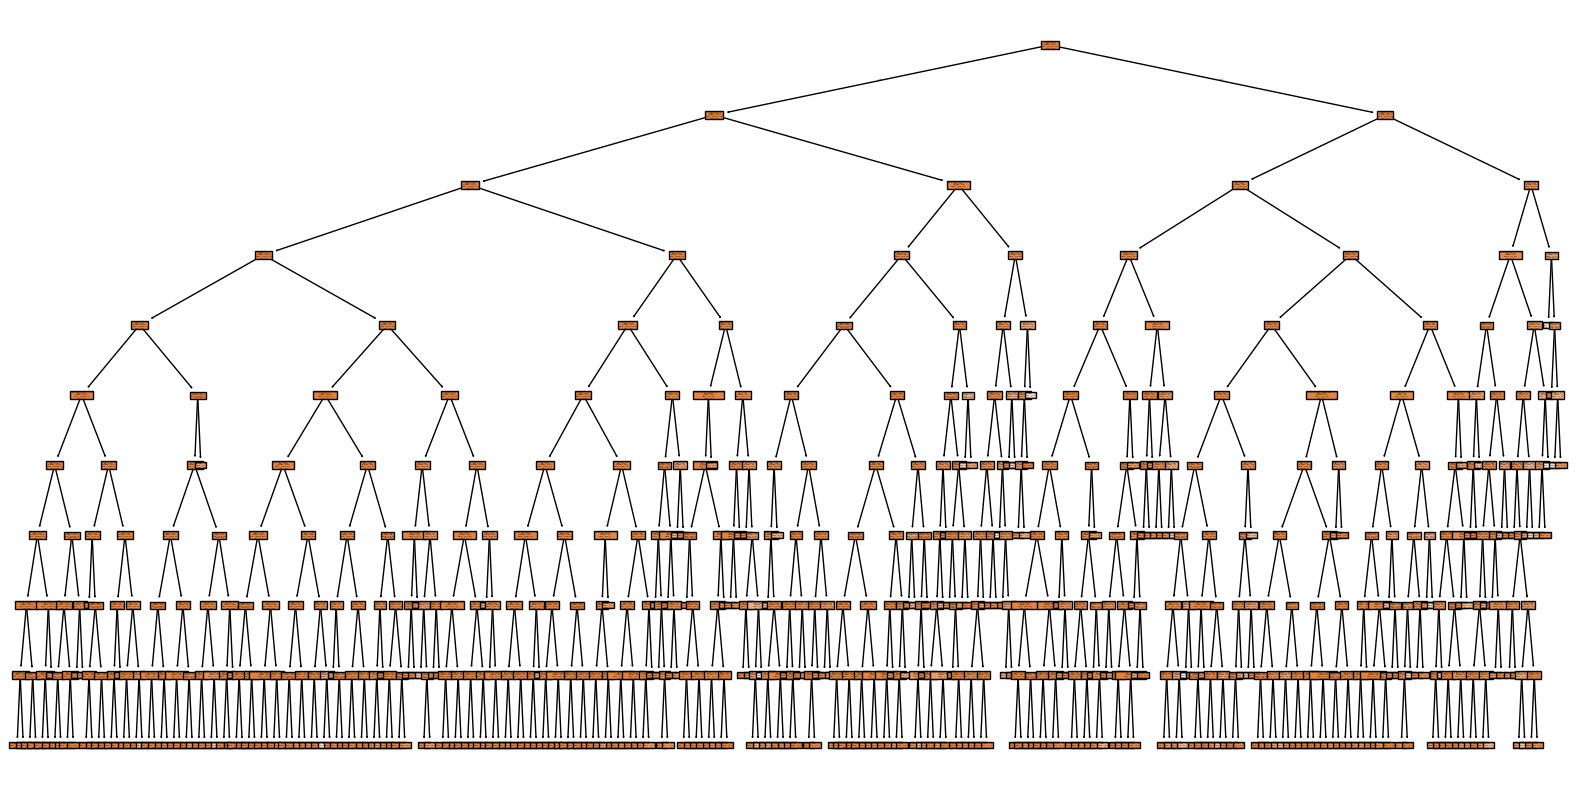

In [ ]:
# %% 

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

# Check for NaN values in y_train
if np.isnan(y_train).sum() > 0:
    # Handle missing values in y_train
    imputer = SimpleImputer(strategy='most_frequent')
    y_train = imputer.fit_transform(y_train.reshape(-1, 1)).ravel()

# Ensure y_train is not empty
if len(y_train) == 0:
    raise ValueError("y_train is empty after imputation. Please check your data.")

# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# Make predictions with the best estimator
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, y_pred)}")

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=True)
plt.show()

Random Forest accuracy: 0.996501490628321


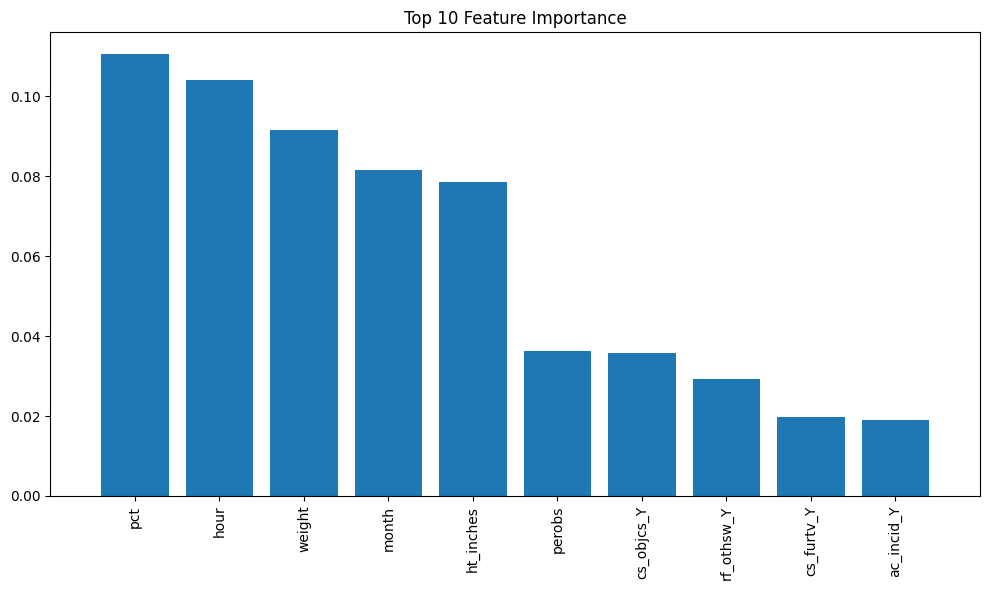

In [ ]:
# %%

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the model with the given parameters
model = RandomForestClassifier(criterion='gini', max_depth= None, min_samples_leaf=10, min_samples_split=2)

# Fit the model to the training data
model.fit(X_train, y_train)


# Evaluate the model on the test set using the pipeline
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest accuracy: {accuracy}")

# Get feature importances from the best model
importances = model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plotting
top_n = 10
plt.figure(figsize=(10, 6))
plt.title(f"Top {top_n} Feature Importance")
plt.bar(range(top_n), importances[indices[:top_n]], align="center")
plt.xticks(range(top_n), feature_names[indices[:top_n]], rotation=90)
plt.xlim([-1, top_n])
plt.tight_layout()
plt.show()

In [ ]:
# %%

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize LogisticRegression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test_scaled)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression accuracy: {accuracy}")

Logistic Regression accuracy: 0.9964920860332358


In [ ]:
# %%

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

# metrics
from sklearn.metrics import accuracy_score
y_pred = nb.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, y_pred)}")

accuracy: 0.995730313831338


In [ ]:
#%% Can we predict if an arrest will be made?

arrests = crimes[['armed', 'pct', 'hour', 'month', 'perobs', 'crimsusp_grouped', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw',
                    'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr',
                    'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 
                    'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other', 'sex', 'race', 'ht_inches', 'weight', 'city', 'arstmade']]

# Convert 'arstmade' to numerical values
arrests['arstmade'] = arrests['arstmade'].map({'N': 0, 'Y': 1})

# Encode categorical variables
categorical_cols = arrests.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(arrests[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded columns
arrests = arrests.drop(columns=categorical_cols).reset_index(drop=True)
arrests = pd.concat([arrests, encoded_cols], axis=1)

# Ensure 'arstmade' is still in the DataFrame
if 'arstmade' not in arrests.columns:
    raise KeyError("'arstmade' column is missing from the DataFrame")

# Define the feature set and the target variable
X = arrests.drop(columns=['arstmade'])
y = arrests['arstmade']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

<ipython-input-22-720a6fbc07ae>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrests['arstmade'] = arrests['arstmade'].map({'N': 0, 'Y': 1})


X_train shape: (425322, 68)
X_test shape: (106331, 68)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}
accuracy: 0.9421147172508487


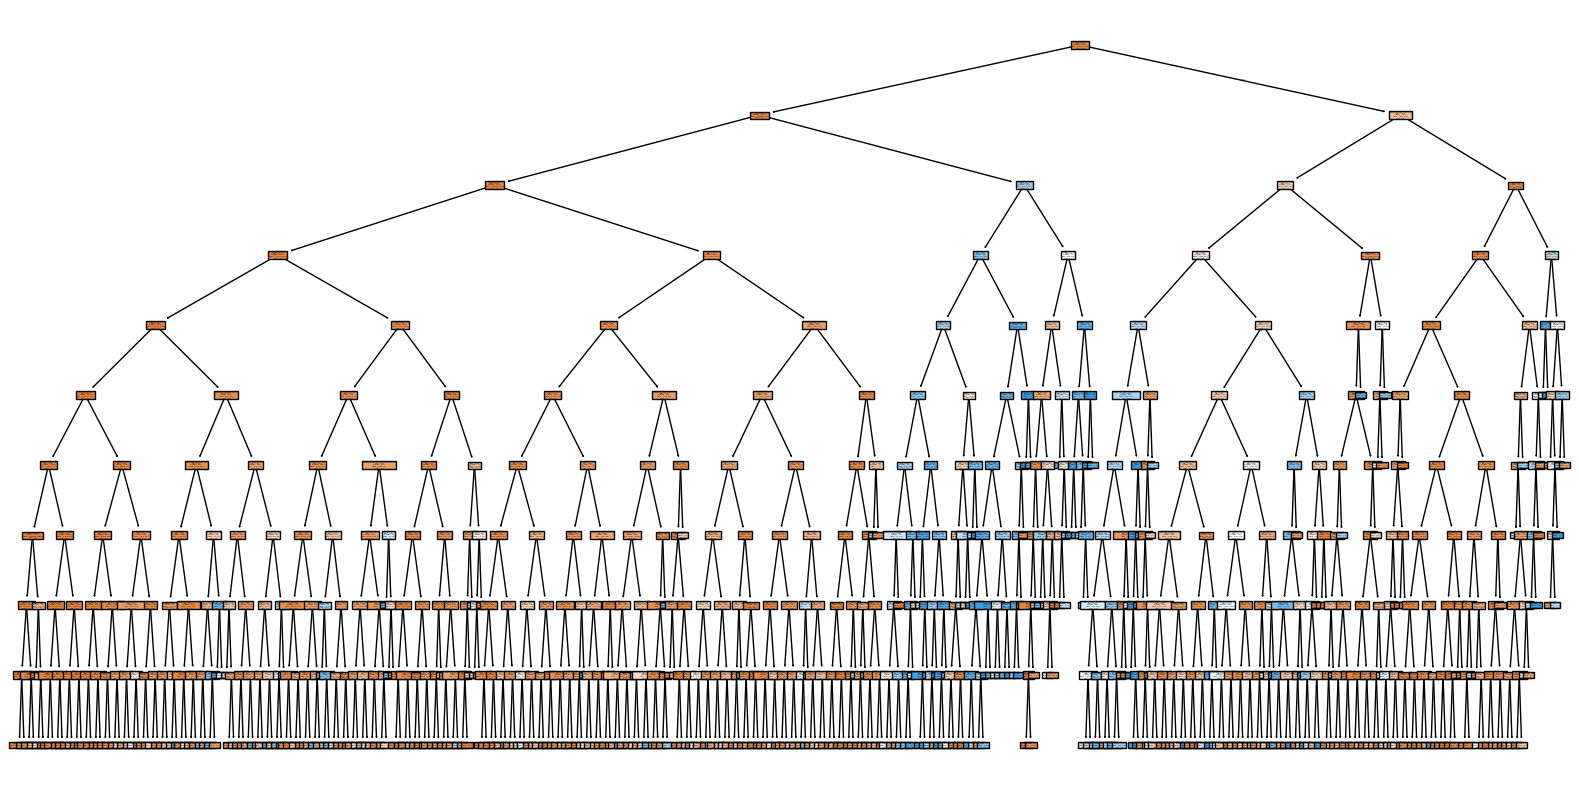

In [ ]:
# %%

# Check for NaN values in y_train
if np.isnan(y_train).sum() > 0:
    # Handle missing values in y_train
    imputer = SimpleImputer(strategy='most_frequent')
    y_train = imputer.fit_transform(y_train.reshape(-1, 1)).ravel()

# Ensure y_train is not empty
if len(y_train) == 0:
    raise ValueError("y_train is empty after imputation. Please check your data.")

# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# Make predictions with the best estimator
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, y_pred)}")

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=True)
plt.show()

In [ ]:
# %%

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, y_train)

 # metrics
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, y_pred)}")

accuracy: 0.9367070750768826


Random Forest accuracy: 0.9400363017370287


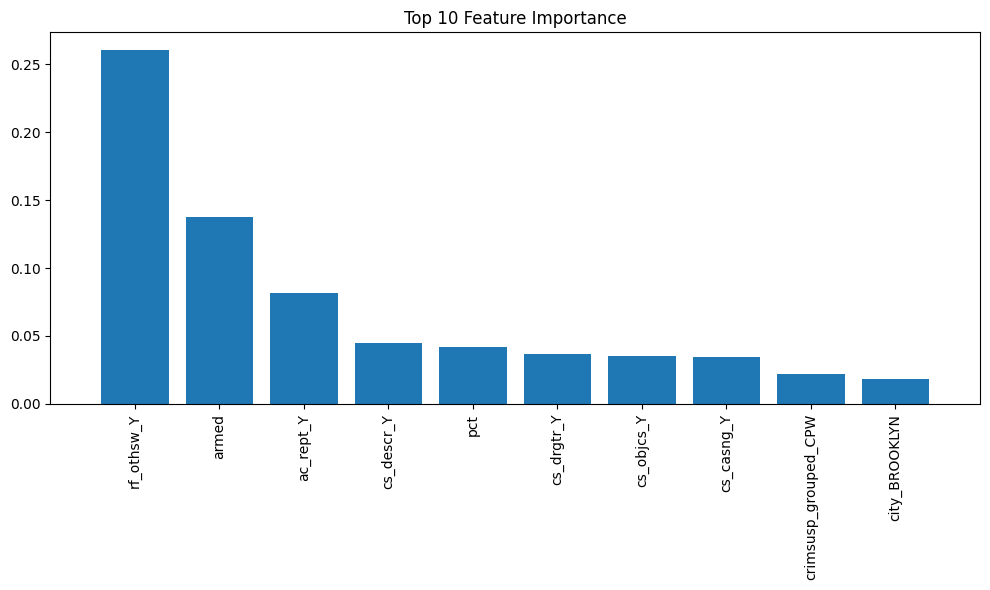

In [ ]:
# %%

# Define the model with the given parameters
model = RandomForestClassifier(criterion='gini', max_depth= 10, min_samples_leaf=5, min_samples_split=20)

# Fit the model to the training data
model.fit(X_train, y_train)


# Evaluate the model on the test set using the pipeline
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest accuracy: {accuracy}")

# Get feature importances from the best model
importances = model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plotting
top_n = 10
plt.figure(figsize=(10, 6))
plt.title(f"Top {top_n} Feature Importance")
plt.bar(range(top_n), importances[indices[:top_n]], align="center")
plt.xticks(range(top_n), feature_names[indices[:top_n]], rotation=90)
plt.xlim([-1, top_n])
plt.tight_layout()
plt.show()

In [ ]:
# %% Can we predict what force will be used by an officer given the other variables?

pf_force = crimes[['armed', 'pct', 'hour', 'month', 'perobs', 'crimsusp_grouped', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw',
                    'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr',
                    'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 
                    'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other', 'sex', 'race', 'ht_inches', 'weight', 'city',
                    'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other']]

# Convert 'pf_xx' to numerical values
pf_force['pf_hands'] = pf_force['pf_hands'].map({'N': 0, 'Y': 1})
pf_force['pf_wall'] = pf_force['pf_wall'].map({'N': 0, 'Y': 1})
pf_force['pf_grnd'] = pf_force['pf_grnd'].map({'N': 0, 'Y': 1})
pf_force['pf_drwep'] = pf_force['pf_drwep'].map({'N': 0, 'Y': 1})
pf_force['pf_ptwep'] = pf_force['pf_ptwep'].map({'N': 0, 'Y': 1})
pf_force['pf_baton'] = pf_force['pf_baton'].map({'N': 0, 'Y': 1})
pf_force['pf_hcuff'] = pf_force['pf_hcuff'].map({'N': 0, 'Y': 1})
pf_force['pf_pepsp'] = pf_force['pf_pepsp'].map({'N': 0, 'Y': 1})
pf_force['pf_other'] = pf_force['pf_other'].map({'N': 0, 'Y': 1})

# Encode categorical variables
categorical_cols = pf_force.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(pf_force[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded columns
pf_force = pf_force.drop(columns=categorical_cols).reset_index(drop=True)
pf_forece = pd.concat([pf_force, encoded_cols], axis=1)

# Define the feature set and the target variable
X = pf_force.drop(columns=['pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other'])
y = pf_force['pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other']

from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base model
base_model = RandomForestClassifier(random_state=42)

# Wrap it with MultiOutputClassifier
model = MultiOutputClassifier(base_model, n_jobs=-1)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

<ipython-input-26-471b23bdadb6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf_force['pf_hands'] = pf_force['pf_hands'].map({'N': 0, 'Y': 1})
<ipython-input-26-471b23bdadb6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf_force['pf_wall'] = pf_force['pf_wall'].map({'N': 0, 'Y': 1})
<ipython-input-26-471b23bdadb6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

KeyError: ('pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other')

In [ ]:
# %% Can we predict what force will be used by an officer given the other variables?

pf_force = crimes[['armed', 'pct', 'hour', 'month', 'perobs', 'crimsusp_grouped', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw',
                    'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr',
                    'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 
                    'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other', 'sex', 'race', 'ht_inches', 'weight', 'city',
                    'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other']]

# Convert 'pf_xx' to numerical values
pf_force['pf_hands'] = pf_force['pf_hands'].map({'N': 0, 'Y': 1})
pf_force['pf_wall'] = pf_force['pf_wall'].map({'N': 0, 'Y': 1})
pf_force['pf_grnd'] = pf_force['pf_grnd'].map({'N': 0, 'Y': 1})
pf_force['pf_drwep'] = pf_force['pf_drwep'].map({'N': 0, 'Y': 1})
pf_force['pf_ptwep'] = pf_force['pf_ptwep'].map({'N': 0, 'Y': 1})
pf_force['pf_baton'] = pf_force['pf_baton'].map({'N': 0, 'Y': 1})
pf_force['pf_hcuff'] = pf_force['pf_hcuff'].map({'N': 0, 'Y': 1})
pf_force['pf_pepsp'] = pf_force['pf_pepsp'].map({'N': 0, 'Y': 1})
pf_force['pf_other'] = pf_force['pf_other'].map({'N': 0, 'Y': 1})

# Encode categorical variables
categorical_cols = pf_force.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(pf_force[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded columns
pf_force = pf_force.drop(columns=categorical_cols).reset_index(drop=True)
pf_force = pd.concat([pf_force, encoded_cols], axis=1)

# Define the feature set and the target variable
X = pf_force.drop(columns=['pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other'])
y = pf_force[['pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other']]

from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base model
base_model = RandomForestClassifier(random_state=42)

# Wrap it with MultiOutputClassifier
model = MultiOutputClassifier(base_model, n_jobs=-1)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

<ipython-input-27-e2896d166c86>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf_force['pf_hands'] = pf_force['pf_hands'].map({'N': 0, 'Y': 1})
<ipython-input-27-e2896d166c86>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf_force['pf_wall'] = pf_force['pf_wall'].map({'N': 0, 'Y': 1})
<ipython-input-27-e2896d166c86>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [ ]:
# %%

from sklearn.metrics import accuracy_score, classification_report

# Evaluate each target column
for i, column in enumerate(y.columns):
    print(f"Results for {column}:")
    accuracy = accuracy_score(y_test[column], y_pred[:, i])
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test[column], y_pred[:, i]))

Results for pf_hands:
Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     92101
           1       0.83      0.24      0.38     14230

    accuracy                           0.89    106331
   macro avg       0.86      0.62      0.66    106331
weighted avg       0.89      0.89      0.87    106331

Results for pf_wall:
Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    103779
           1       0.84      0.10      0.17      2552

    accuracy                           0.98    106331
   macro avg       0.91      0.55      0.58    106331
weighted avg       0.97      0.98      0.97    106331

Results for pf_grnd:
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105990
           1       0.83      0.06      0.11       341

    accuracy                           1.00    106331
   macro avg       

c:\Users\juanj\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\juanj\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\juanj\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    105646
           1       0.89      0.14      0.24       685

    accuracy                           0.99    106331
   macro avg       0.94      0.57      0.62    106331
weighted avg       0.99      0.99      0.99    106331



In [ ]:
# %%

from sklearn.metrics import accuracy_score, classification_report

# # Evaluate each target column
# for i, column in enumerate(y.columns):
#     print(f"Results for {column}:")
#     accuracy = accuracy_score(y_test[column], y_pred[:, i])
#     print(f"Accuracy: {accuracy:.2f}")
#     print(classification_report(y_test[column], y_pred[:, i]))

from sklearn.metrics import classification_report

# Print classification report for each target column
for i, column in enumerate(y.columns):
    print(f"Classification Report for {column}:")
    print(classification_report(y_test[column], y_pred[:, i]))

Classification Report for pf_hands:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     92101
           1       0.83      0.24      0.38     14230

    accuracy                           0.89    106331
   macro avg       0.86      0.62      0.66    106331
weighted avg       0.89      0.89      0.87    106331

Classification Report for pf_wall:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    103779
           1       0.84      0.10      0.17      2552

    accuracy                           0.98    106331
   macro avg       0.91      0.55      0.58    106331
weighted avg       0.97      0.98      0.97    106331

Classification Report for pf_grnd:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105990
           1       0.83      0.06      0.11       341

    accuracy                           1.00    106331
   macro avg       0.9

c:\Users\juanj\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\juanj\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\juanj\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    106320
           1       0.00      0.00      0.00        11

    accuracy                           1.00    106331
   macro avg       0.50      0.50      0.50    106331
weighted avg       1.00      1.00      1.00    106331

Classification Report for pf_other:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    105646
           1       0.89      0.14      0.24       685

    accuracy                           0.99    106331
   macro avg       0.94      0.57      0.62    106331
weighted avg       0.99      0.99      0.99    106331



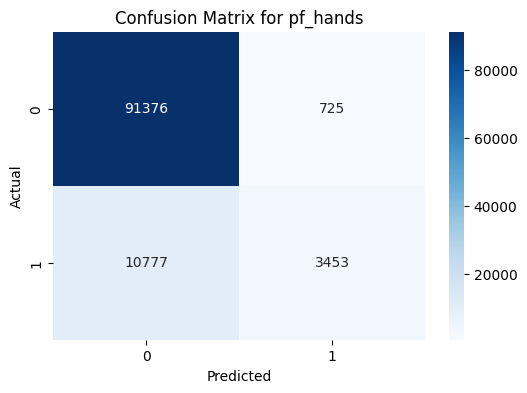

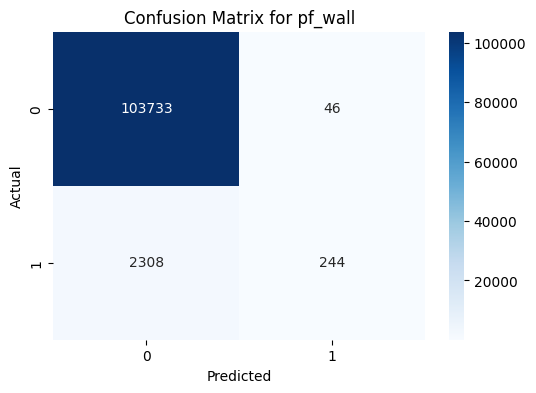

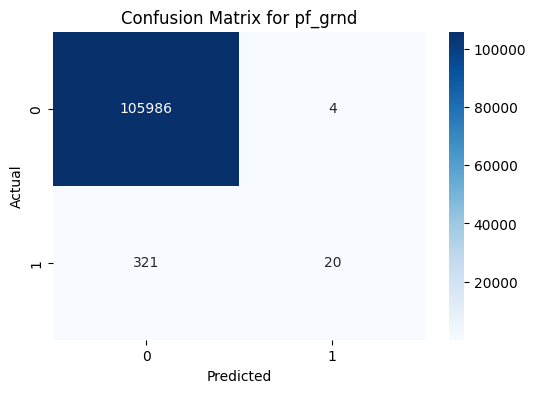

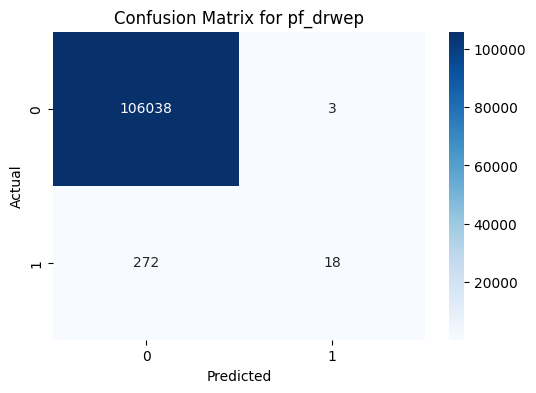

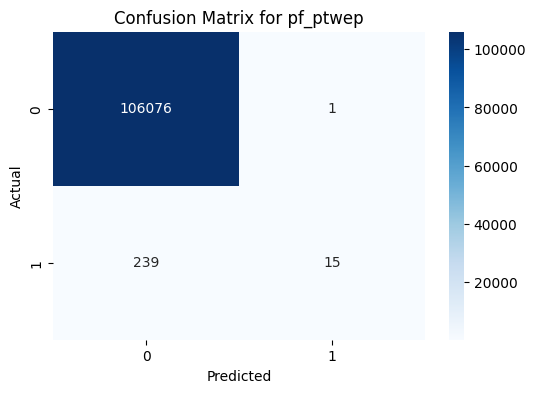

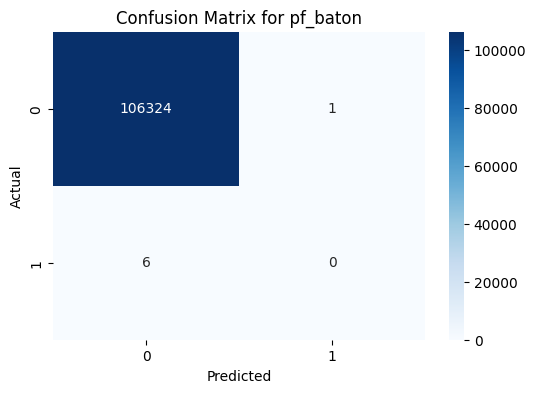

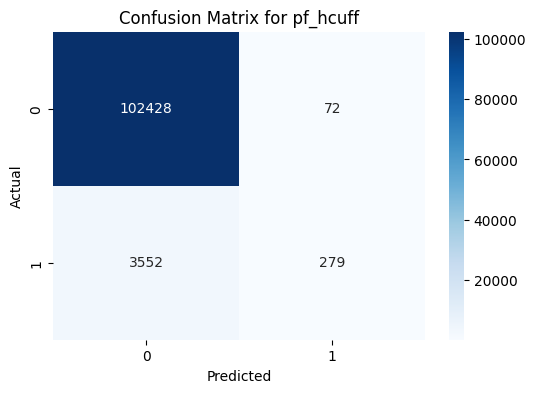

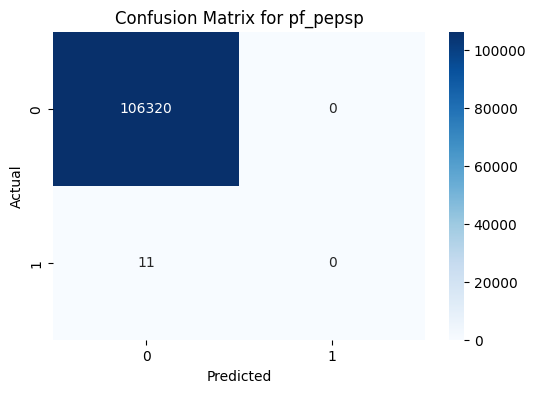

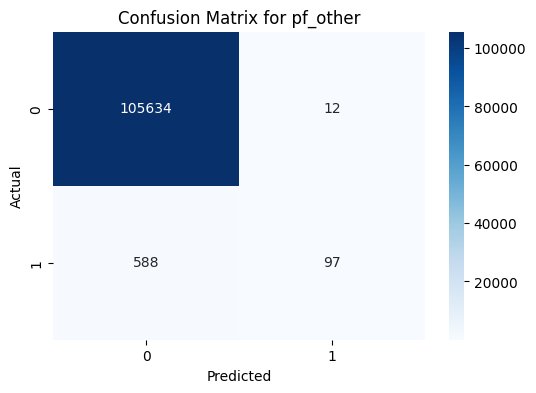

In [ ]:
# %%

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix for each target column
for i, column in enumerate(y.columns):
    cm = confusion_matrix(y_test[column], y_pred[:, i])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {column}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
# %%

from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

# Initialize the base model
base_model = KNeighborsClassifier()

# Wrap it with MultiOutputClassifier
model = MultiOutputClassifier(base_model, n_jobs=1)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# %%

from sklearn.metrics import accuracy_score

# Evaluate each target column
for i, column in enumerate(y.columns):
    accuracy = accuracy_score(y_test[column], y_pred[:, i])
    print(f"Accuracy for {column}: {accuracy:.2f}")

Accuracy for pf_hands: 0.86
Accuracy for pf_wall: 0.98
Accuracy for pf_grnd: 1.00
Accuracy for pf_drwep: 1.00
Accuracy for pf_ptwep: 1.00
Accuracy for pf_baton: 1.00
Accuracy for pf_hcuff: 0.96
Accuracy for pf_pepsp: 1.00
Accuracy for pf_other: 0.99


In [ ]:
# %%

from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

# Initialize the base model
base_model = XGBClassifier(random_state=42)

# Wrap it with MultiOutputClassifier
model = MultiOutputClassifier(base_model, n_jobs=1)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# %%

# Evaluate each target column
for i, column in enumerate(y.columns):
    accuracy = accuracy_score(y_test[column], y_pred[:, i])
    print(f"Accuracy for {column}: {accuracy:.2f}")

Accuracy for pf_hands: 0.88
Accuracy for pf_wall: 0.98
Accuracy for pf_grnd: 1.00
Accuracy for pf_drwep: 1.00
Accuracy for pf_ptwep: 1.00
Accuracy for pf_baton: 1.00
Accuracy for pf_hcuff: 0.96
Accuracy for pf_pepsp: 1.00
Accuracy for pf_other: 0.99
